In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("/content/Retail Data.csv")
data

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,...,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,...,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,...,$42.11,$80.98,$38.87,45.0,$873.32,4%,$72.23,$837.57,$7.18,$82.58
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,...,$5.33,$8.60,$3.27,16.0,$73.52,1%,$4.35,$740.67,$6.19,$730.92
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,...,$1.53,$2.78,$1.25,49.0,$138.46,7%,$5.95,$123.77,$1.34,$125.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6831-1,02-11-2016,Roland Murray,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Critical,Artisan Hi-Liter Smear-Safe Highlighters,...,$2.98,$5.84,$2.86,35.0,$115.40,2%,$10.81,$104.09,$0.83,$101.22
4996,6847-1,16-12-2015,Patrick OBrill,"63 Riley Street,Woolloomooloo",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Smiths Colored Interoffice Envelopes,...,$19.83,$30.98,$11.15,49.0,"$1,999.69",7%,$143.91,"$1,947.75",$19.51,"$1,052.55"
4997,6922-1,28-09-2016,Troy Staebel,"1-2/299 Sussex St,Sydney",Sydney,NSW,Consumer,Aanya Zhang,Low,Laser DVD-RAM discs,...,$20.18,$35.41,$15.23,19.0,$929.40,9%,$27.88,$901.52,$1.99,$921.03
4998,6939-1,18-06-2016,Shaun Weien,"Shop 3/144 Wattle St,Ultimo",Sydney,NSW,Corporate,Samantha Chairs,Not Specified,Artisan 479 Labels,...,$1.59,$2.61,$1.02,23.0,$66.54,5%,$4.46,$63.77,$0.50,$64.27


In [4]:
# 1. View the structure of the dataset (columns, types, missing values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order No           5000 non-null   object 
 1   Order Date         5000 non-null   object 
 2   Customer Name      5000 non-null   object 
 3   Address            4999 non-null   object 
 4   City               5000 non-null   object 
 5   State              5000 non-null   object 
 6   Customer Type      5000 non-null   object 
 7   Account Manager    5000 non-null   object 
 8   Order Priority     5000 non-null   object 
 9   Product Name       5000 non-null   object 
 10  Product Category   5000 non-null   object 
 11  Product Container  5000 non-null   object 
 12  Ship Mode          5000 non-null   object 
 13  Ship Date          5000 non-null   object 
 14  Cost Price         5000 non-null   object 
 15  Retail Price       5000 non-null   object 
 16  Profit Margin      5000 

In [5]:
# 2. What is the shape (rows, columns) of the dataset?
v=data.shape
print("The shape of dataset:",v)

The shape of dataset: (5000, 24)


In [6]:
# 3. Are there any duplicate records?
duplicate=data.duplicated().sum()
print("there are",duplicate,"records.")

there are 0 records.


In [7]:
# 4. Are there any missing or corrupted entries in Ship Date, Order Date, or numeric columns?
data.isnull().sum()

,0
Order No,0
Order Date,0
Customer Name,0
Address,1
City,0
State,0
Customer Type,0
Account Manager,0
Order Priority,0
Product Name,0


In [8]:
# 5. Convert Order Date and Ship Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d-%m-%Y')

In [9]:
# 6. Check for future or inconsistent shipping dates.
today=pd.Timestamp.today().normalize()
futuredate=(data["Ship Date"]>today).sum()
print("future dates are:",futuredate)
inconsistentdate=(data["Ship Date"]<data["Order Date"]).sum()
print("inconsistent dates are:",inconsistentdate)

future dates are: 0
inconsistent dates are: 75


In [44]:
# 7. Convert price columns to numeric (remove $ and commas).
columns=['Cost Price', 'Retail Price', 'Sub Total', 'Discount $','Order Total', 'Shipping Cost', 'Total','Profit Margin']
data[columns] = data[columns].replace({r'\$': '', ',': ''}, regex=True).astype(float)
print(data[columns].head())

   Cost Price  Retail Price  Sub Total  Discount $  Order Total  \
0      156.50        300.97    4533.52      194.83      4757.22   
1        0.24          1.26      45.20        0.00        45.90   
2       42.11         80.98     873.32       72.23       837.57   
3        5.33          8.60      73.52        4.35       740.67   
4        1.53          2.78     138.46        5.95       123.77   

   Shipping Cost    Total  Profit Margin  
0           7.18  4291.55         144.47  
1           0.70    46.91           1.02  
2           7.18    82.58          38.87  
3           6.19   730.92           3.27  
4           1.34   125.97           1.25  


In [11]:
# 8. What are the unique values in Customer Type and Order Priority?
v= data["Customer Type"].unique()
h=data["Order Priority"].unique()
print("unique values in Customer Type:",v)
print("unique values in Order Priority:",h)

unique values in Customer Type: ['Small Business' 'Corporate' 'Consumer' 'Home Office']
unique values in Order Priority: ['Critical' 'Medium' 'Not Specified' 'Low' 'High']


In [12]:
# 9. What are the most common shipping modes?
common=data["Ship Mode"].value_counts().idxmax()
print(common,"is the most common shipping mode.")

Regular Air is the most common shipping mode.


In [13]:
# 10.  Which cities have the highest number of orders?
t=data.groupby('City').size().idxmax()
print(t,"have the highest number of orders.")

Sydney have the highest number of orders.


In [14]:
# 11. What’s the range of order quantities and prices?
order_quantity_range = data['Order Quantity'].max() - data['Order Quantity'].min()
order_total_range = data['Order Total'].max() - data['Order Total'].min()
print("Order Quantity Range:", order_quantity_range)
print("Order Total Range:", order_total_range)

Order Quantity Range: 49.0
Order Total Range: 28297.8


In [15]:
# 12. Create a new column for shipping duration.
data['Shipping Duration'] = data['Ship Date'] - data['Order Date']
print(data['Shipping Duration'].head())

0   2 days
1   2 days
2   0 days
3   2 days
4   4 days
Name: Shipping Duration, dtype: timedelta64[ns]


In [16]:
# 13. Are there any orders with zero or negative total or quantity?
zero_quantity = (data['Order Quantity'] <= 0).sum(),(data['Total'] <= 0).sum()
print("Orders with zero or negative quantity:", zero_quantity)

Orders with zero or negative quantity: (np.int64(0), np.int64(0))


In [17]:
# 14. Are all discount percentages matching discount dollar amounts?
data["Retail Price"] = pd.to_numeric(data["Retail Price"], errors="coerce")
data["Order Quantity"] = pd.to_numeric(data["Order Quantity"], errors="coerce")
data["Discount %"] = pd.to_numeric(data["Discount %"], errors="coerce")
data["Discount $"] = pd.to_numeric(data["Discount $"], errors="coerce")
discount_match = (data['Discount %'] * data['Sub Total']).round(2) == data['Discount $']
e=discount_match.unique()
print(e)

[False]


In [18]:
# 15. Check for mismatches in total calculation’
data["Discount_Amount"] = data["Sub Total"] * (data["Discount %"] / 100)
data["Expected_Total"] = data["Sub Total"] - data["Discount_Amount"] + data["Shipping Cost"]
data["Mismatch"] = data["Expected_Total"].round(2) != data["Order Total"].round(2)
data["Mismatch"].head(5)


,Mismatch
0,True
1,True
2,True
3,True
4,True


In [19]:
# 16. Identify top 5 products by order quantity.
top_5_products = data.groupby('Product Name')['Order Quantity'].sum().nlargest(5)
print(top_5_products)

Product Name
Artisan 474 Labels                         3395.0
Smiths General Use 3-Ring Binders          3220.0
Artisan 479 Labels                         3039.0
Artisan 481 Labels                         2996.0
Apex Preferred Stainless Steel Scissors    2896.0
Name: Order Quantity, dtype: float64


In [20]:
# 17. Which Account Manager handled the most revenue?
revenue_by_manager = data.groupby("Account Manager")["Order Total"].sum()
top_manager = revenue_by_manager.idxmax()
top_revenue = revenue_by_manager.max()

top_manager, top_revenue

('Connor Betts', 746122.5599999999)

In [21]:
# 18. What is the average shipping cost by mode?
c=data.groupby("Ship Mode")["Shipping Cost"].mean()
print(c)

Ship Mode
Delivery Truck    5.270085
Express Air       5.247311
Regular Air       5.503553
Name: Shipping Cost, dtype: float64


In [22]:
# 19.  Find the most profitable product.
data["Profit"] = data["Order Total"] - data["Cost Price"]
most_profitable_product = data.groupby("Product Name")["Profit"].sum().idxmax()
most_profitable_product

'Cando PC940 Copier'

In [23]:
# 20. Find the most profitable product.
data["Profit"] = data["Order Total"] - data["Cost Price"]
most_profitable_product = data.groupby("Product Name")["Profit"].sum().idxmax()
most_profitable_product

'Cando PC940 Copier'

In [28]:
####  Insightful Analysis Questions ####
# 1. What is the total revenue generated across all orders?
total_revenue = data["Order Total"].sum()
print("the total revenue generated across all orders is:",total_revenue)

the total revenue generated across all orders is: 3808999.85


In [38]:
# 2. Which customer type generates more revenue?
revenue_by_customer_type = data.groupby("Customer Type")["Order Total"].sum()
most_profitable_customer_type = revenue_by_customer_type.idxmax()
print("more revenue generate by:",most_profitable_customer_type)
## corporate customer type generates more revenue.

more revenue generate by: Corporate


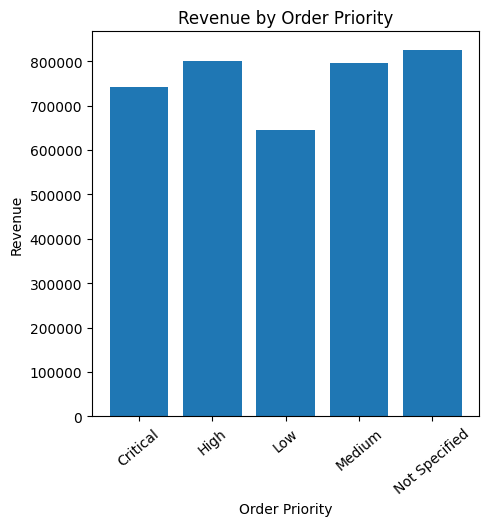

In [37]:
# 3. How does order priority affect revenue?
revenue_by_priority = data.groupby('Order Priority')['Order Total'].sum()
plt.figure(figsize=(5,5))
plt.bar(revenue_by_priority.index, revenue_by_priority.values)
plt.xlabel("Order Priority")
plt.ylabel("Revenue")
plt.title("Revenue by Order Priority")
plt.xticks(rotation=40)
plt.show()
## low order priority generates least revenue, where critical,high,medium order priority genreates almost similar revenue,and not specified ordere priority generates higher revenue.
## revenue does not increase strictly with higher priority, but low-priority orders consistently contribute the least.

In [45]:
# 4. What is the average profit margin by product category?
y=data.groupby("Product Category")["Profit Margin"].mean()
print(y)

Product Category
Furniture          12.701953
Office Supplies    17.682609
Technology         20.423208
Name: Profit Margin, dtype: float64


In [47]:
# 5. What is the most profitable product overall?
data["Profit"] = data["Order Total"] - data["Cost Price"]
most_profitable_product = data.groupby("Product Name")["Profit"].sum().idxmax()
print(most_profitable_product,"is the most profitable product.")

Cando PC940 Copier is the most profitable product.


In [51]:
# 6. How many days does it usually take to ship an order?
data['Shipping Days'] = (data['Ship Date'] - data['Order Date']).dt.days
data["Shipping Days"].mean()
print("it usually takes",data["Shipping Days"].mean(),"days to ship an order.")

it usually takes 1.8356 days to ship an order.


In [54]:
# 7. Do longer shipping times impact profit margins?
correlation = data['Shipping Days'].corr(data['Profit Margin'])
print(f"shipping time impact on prifit margin is:{correlation:.2f}%")
## NO,longer shipping times does not impact profit margins.  The correlation is very close to zero, which means shipping duration has no meaningful effect on profitability.

shipping time impact on prifit margin is:-0.02%


In [55]:
# 8. Which city brings in the highest revenue?
city_revenue=data.groupby("City")["Order Total"].sum().idxmax()
print(city_revenue,"brings in the highest revenue.")

Sydney brings in the highest revenue.


In [56]:
# 9. Which account manager generated the most revenue?
revenue_by_manager = data.groupby("Account Manager")["Order Total"].sum().idxmax()
print(revenue_by_manager,"generated the most revenue.")

Connor Betts generated the most revenue.


In [57]:
# 10. Which shipping mode is most cost-effective (lowest avg. shipping)?
shipping_mode_cost = data.groupby("Ship Mode")["Shipping Cost"].mean().idxmax()
print(shipping_mode_cost,"is the most cost-effective.")

Regular Air is the most cost-effective.


In [63]:
# 11. Do higher discounts reduce profits?
W=data['Profits'] = (data['Retail Price'] - data['Cost Price']) * data['Order Quantity']
Y=data['Discount $'].corr(data['Profits'])
print(f"correlation:{Y:.2f}%")
## there is a weak positive relationship between discount percentage and profit. This means higher discounts are slightly associated with higher profits, but the impact is not very strong.

correlation:0.35%


In [64]:
# 12. . Which state has the highest number of orders?
order_by_stat=data.groupby("State")["Order Quantity"].sum().idxmax()
print(order_by_stat,"has the highest number of orders.")

NSW has the highest number of orders.


In [69]:
# 13. What is the average discount % across all orders?
data['Discount %'] = pd.to_numeric(data['Discount %'], errors='coerce')
average_discount = data['Discount %'].mean()
print(average_discount)

nan


In [71]:
# 14. What is the average total spend per order?
average_total_spend = data['Order Total'].mean()
print(average_total_spend)

761.79997


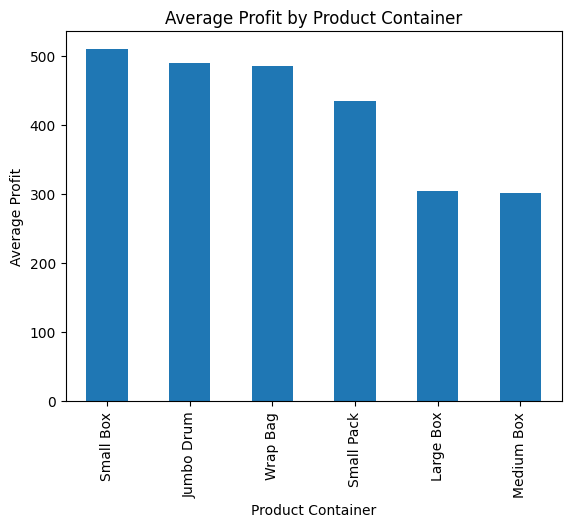

In [74]:
# 15.  Are certain containers (e.g., Small Box, Wrap Bag) more profitable?
profit_by_container = data.groupby('Product Container')['Profits'].mean().sort_values(ascending=False)
profit_by_container.plot(kind='bar')
plt.xlabel('Product Container')
plt.ylabel('Average Profit')
plt.title('Average Profit by Product Container')
plt.show()
## YES, small box,jumbo drums,wrap bag are more profitable than others.